In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [54]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [55]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [56]:
def check_missing_col(dataframe):
    counted_missing_col=0
    for i,col in enumerate(train.columns):
        missing_values=sum(train[col].isna())
        is_missing= True if missing_values >=1 else False
        if is_missing:
            counted_missing_col +=1
            print(f'결측치가 있는 컬럼은 : {col}입니다.')
            print(f'총 {missing_values}개의 결측치가 존재 합니다.')
        if i ==len(train.columns) -1 and counted_missing_col ==0:
            print('결측치가 없습니다')

check_missing_col(train)



결측치가 없습니다


In [57]:
def separate_datetime(dataframe):
    year=[]
    month=[]
    day=[]

    for date in dataframe.date_time:
        year_point, month_point, day_point =date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day= separate_datetime(train)
train['year'] = year
train['month']=month
train['day']=day

train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


In [58]:
data_description = train.describe()
data_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000


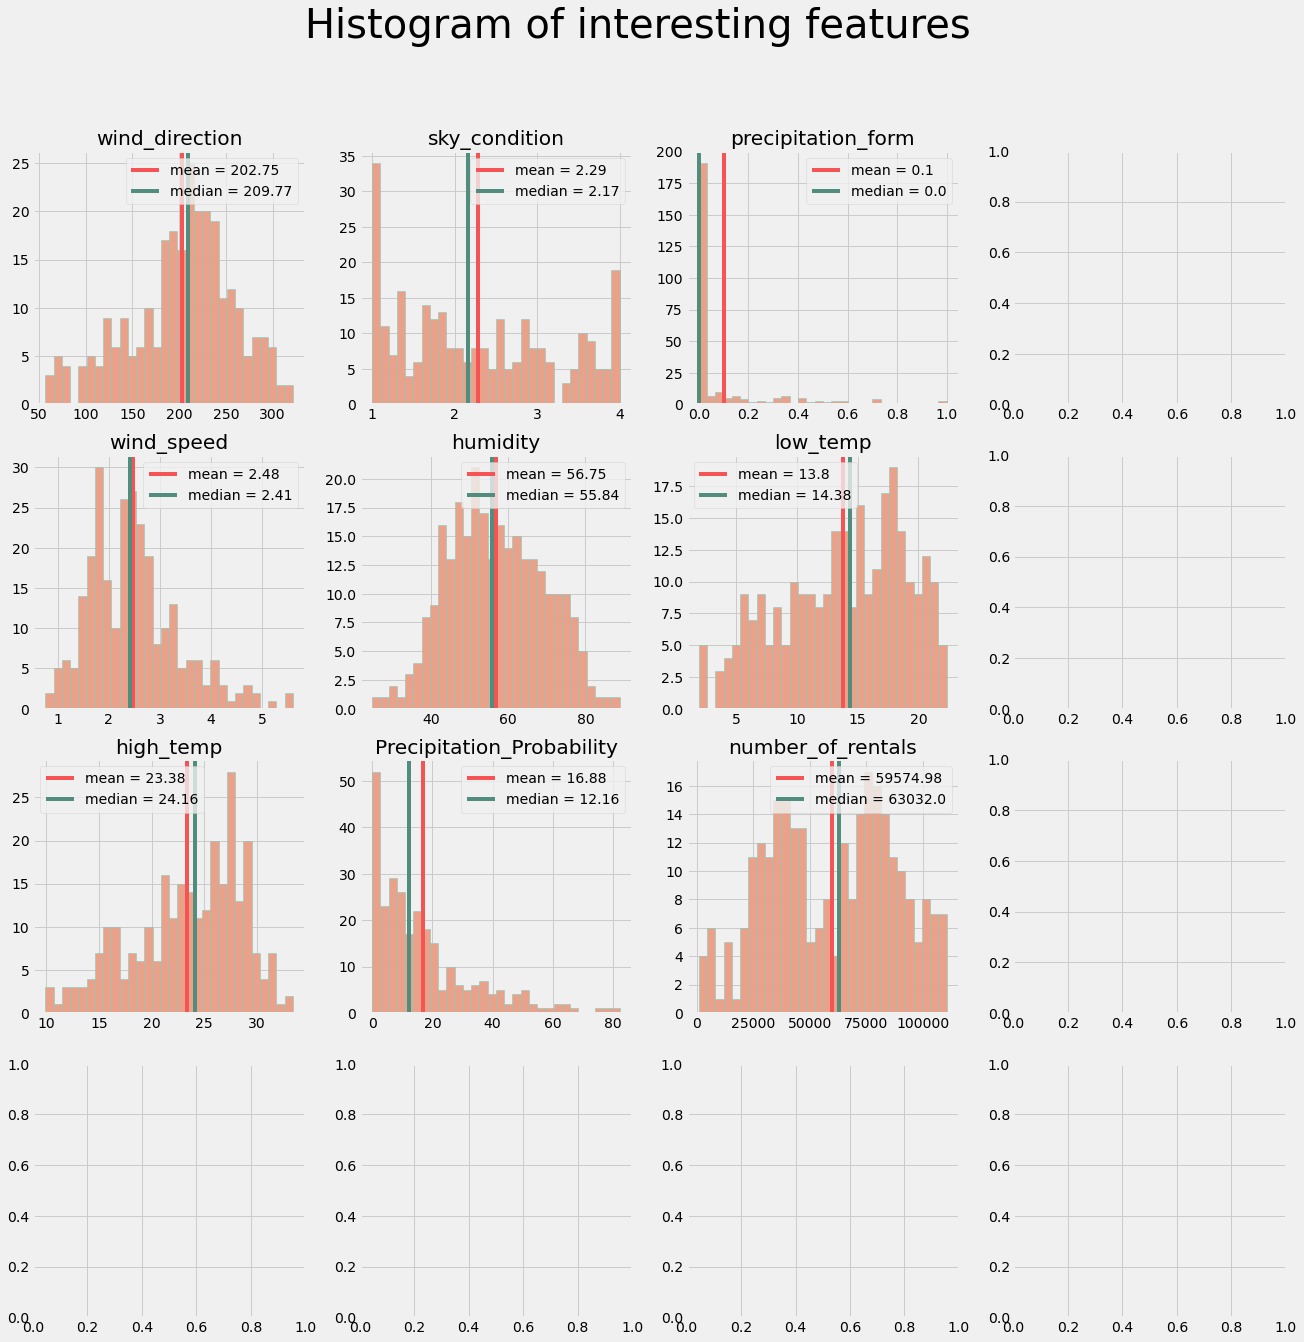

In [59]:
interest_columns= ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp','high_temp','Precipitation_Probability','number_of_rentals']
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(4,4, figsize=(20,20))
fig.suptitle('Histogram of interesting features', fontsize=40)

columns_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(train[interest_columns[columns_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_columns[columns_idx])
        ax[i][j].axvline(data_description[interest_columns[columns_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_columns[columns_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_columns[columns_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_columns[columns_idx]]['50%'], 2)}")
        ax[i][j].legend()
        columns_idx += 1

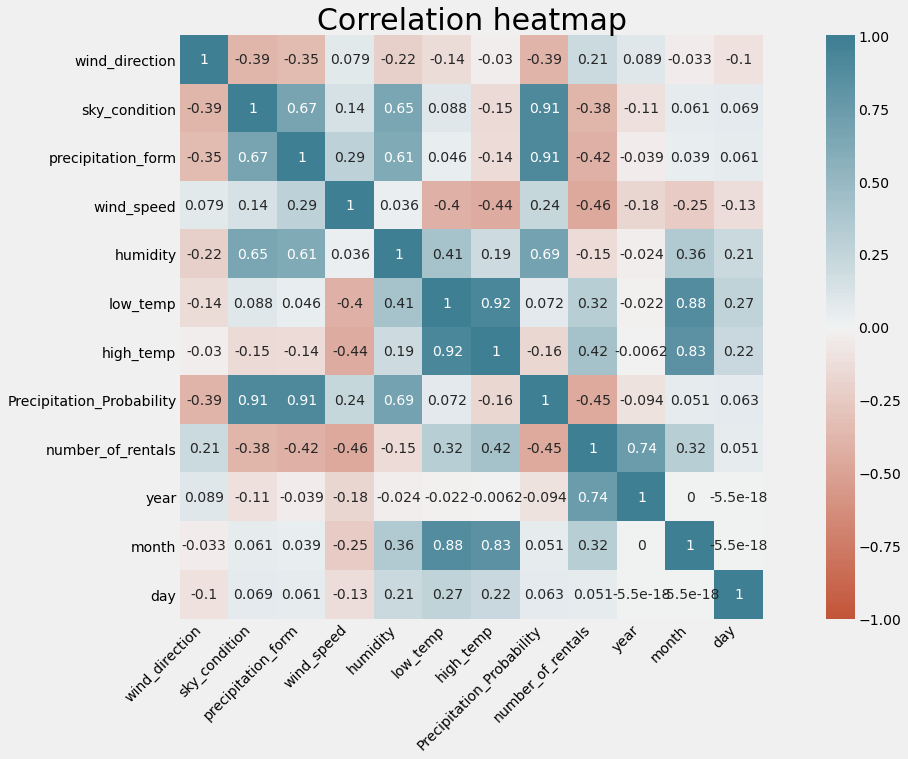

In [60]:
bicycle_number= train.select_dtypes(np.number)
corr = bicycle_number.corr()

plt.figure(figsize=(20,10))
ax= sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap= sns.diverging_palette(20,220, n=200),
    square =True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment ='right'
)

plt.title('Correlation heatmap', fontsize=30)

plt.show()

In [61]:
year_rentals = train.groupby('year').sum()['number_of_rentals']
month_rentals =train.groupby('month').sum()['number_of_rentals']
day_rentals = train.groupby('day').sum()['number_of_rentals']



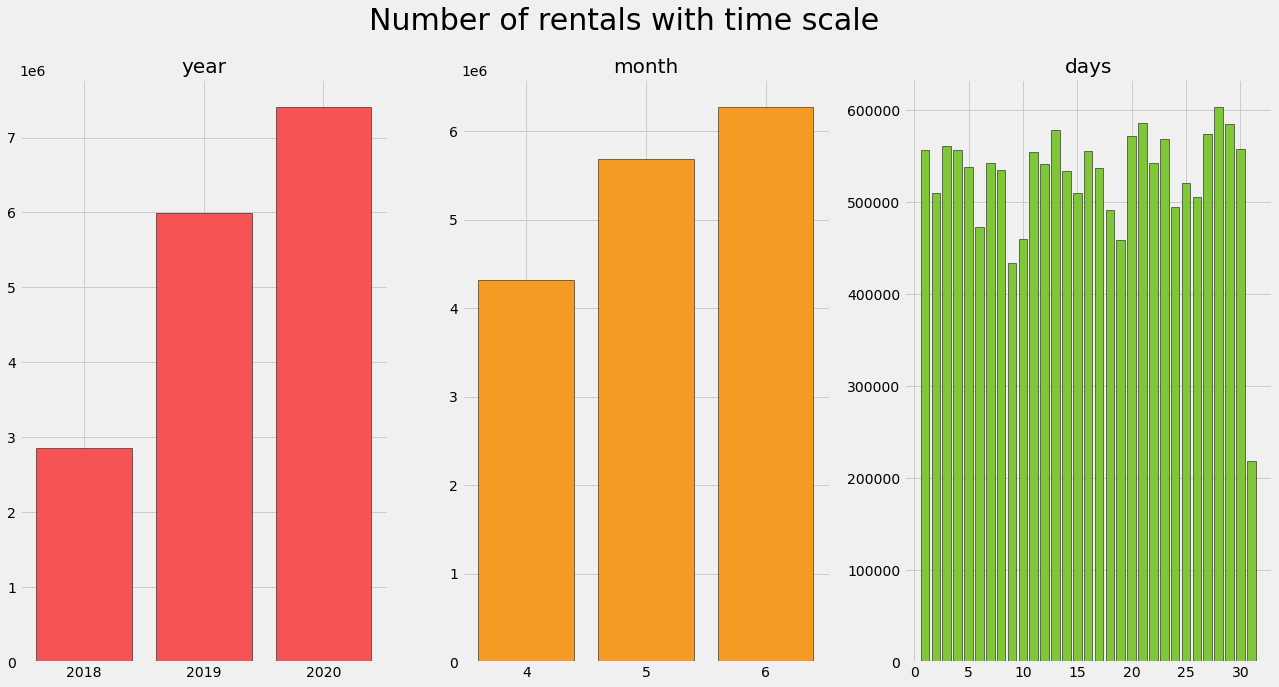

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 20)

plt.show()

In [63]:
week_day = pd.to_datetime(train['date_time']).dt.day_name()
train['week_day']= week_day
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


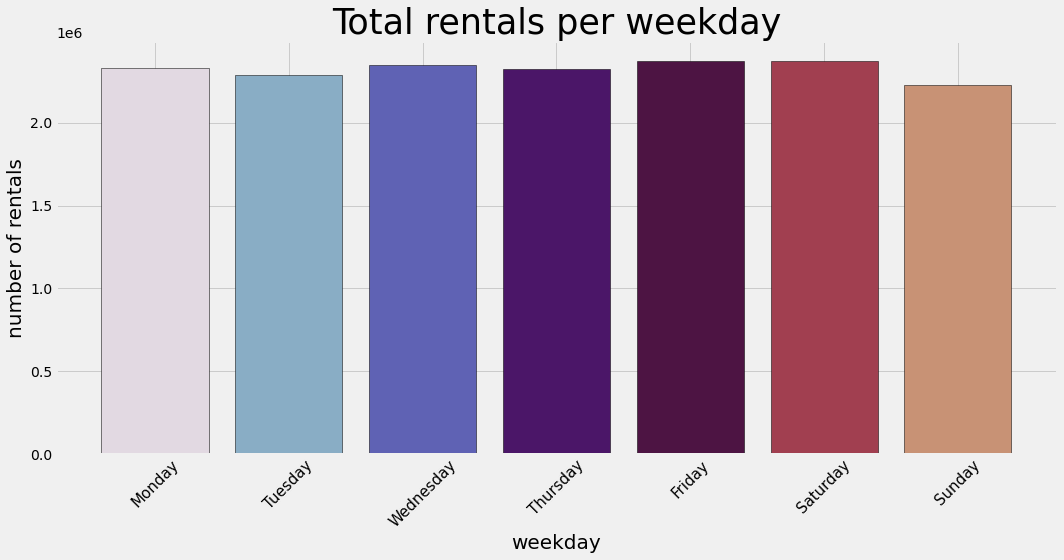

In [64]:
day_table = train.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('Total rentals per weekday', fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=20)
plt.tight_layout()
plt.show()

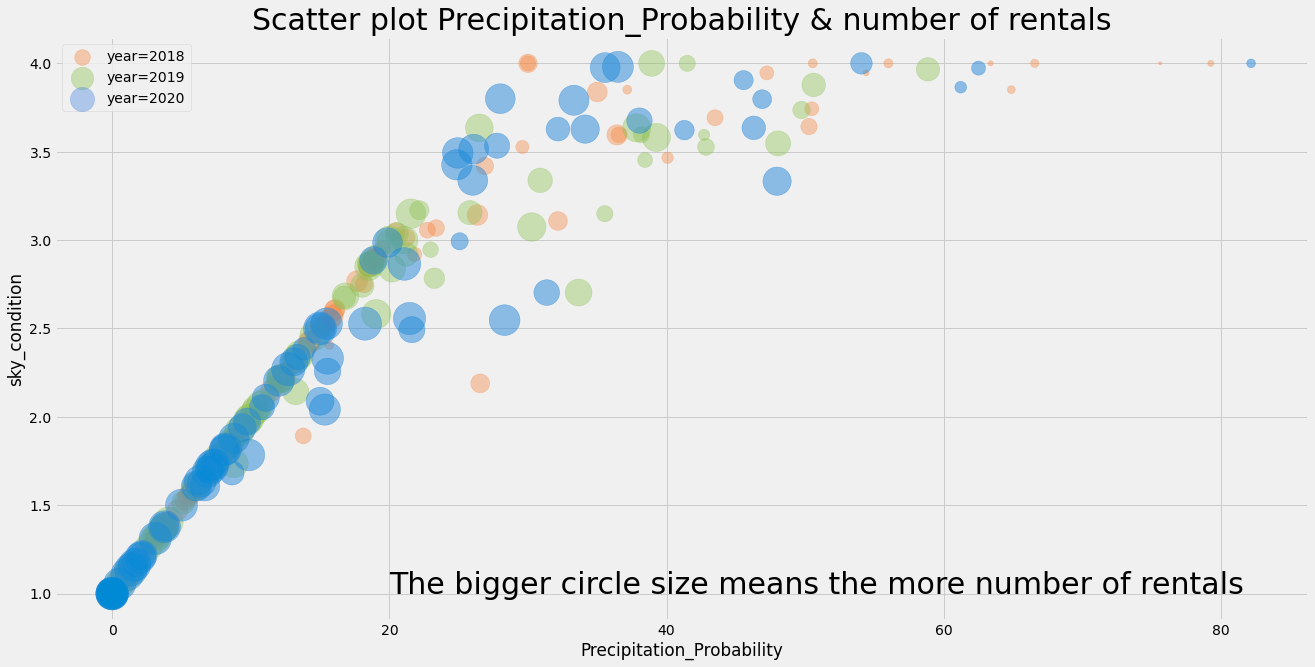

In [65]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for year, color in zip(years, colors):
    
    precipitation_prb = train[train['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = train[train['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = train[train['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()

In [66]:
train['Temperature']= (train['low_temp']+ train['high_temp'])/2


In [67]:
train['Feeling']= (5/9)*train['Temperature']-0.55*((100-train['humidity']/100)*(5/9*train['Temperature']-26)+32)

In [68]:

# 그룹화
train.loc[train['Precipitation_Probability'] <40, 'Precipitation_Probability'] = 0
train.loc[train['Precipitation_Probability'] >=40, 'Precipitation_Probability'] = 1


# 필요 없다고 판단되는 정보 삭제
train.drop(['date_time','humidity','wind_direction','week_day','day'], axis=1,  inplace=True)

In [69]:
Y = train['number_of_rentals']
X = train.drop(['number_of_rentals'], axis=1)

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=3, random_state=0)
model.fit(X,Y)

RandomForestRegressor(max_depth=3, random_state=0)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [71]:
year, month, day = separate_datetime(test)
    
test['year'] = year
test['month'] = month
test['day'] = day
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


In [72]:
#새로운 변수 추가
test['Temperature'] = (test['low_temp'] + test['high_temp'])/2
test['Feeling'] = (5/9)*test['Temperature']-0.55*((100-test['humidity'])/100)*((5/9)*test['Temperature']-26)+32

# 그룹화
test.loc[test['Precipitation_Probability'] <40, 'Precipitation_Probability'] = 0
test.loc[test['Precipitation_Probability'] >=40, 'Precipitation_Probability'] = 1


# 필요 없다고 판단되는 정보 삭제
test.drop(['date_time','humidity','wind_direction','day'], axis=1,  inplace=True)

In [73]:
ans = model.predict(test)

In [78]:
submission = pd.read_csv('sample_submission.csv')

In [76]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [79]:
submission.to_csv('test_submission.csv', index= False)